In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.backend.Logger import Logger


In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": True
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
site = 'PA'
# site = 'PA'

if site == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2018, 2019, 2020]

elif site == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2019, 2020, 2021]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		# exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		# exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': True}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

In [7]:
trainer.classes_mode

True

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

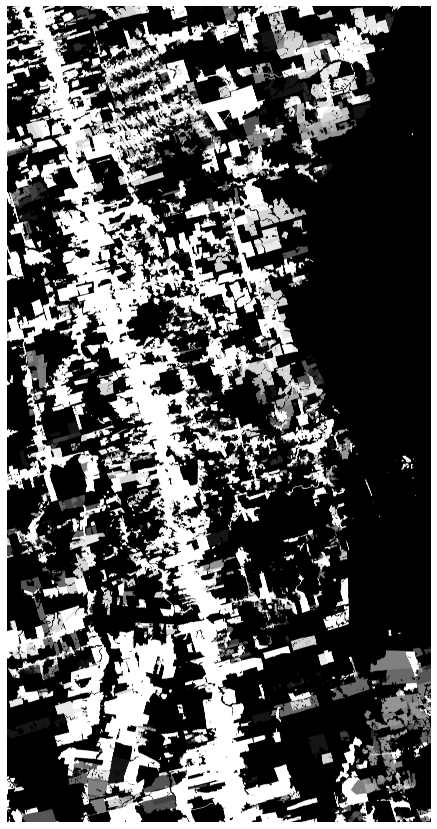

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(17730, 9200, 21)

In [48]:
trainer.setPadding()

-30.0 -16.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.500655e-16
    np.mean(value): 0.014949512
    np.max(value): 0.9961816


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [57]:
trainer.unpadMeanProb()

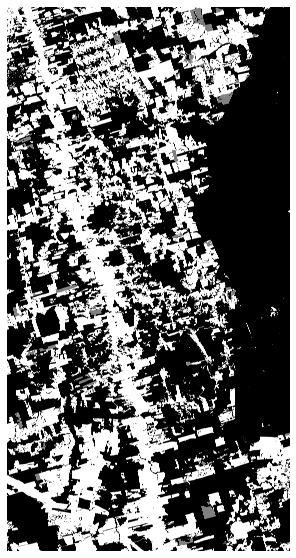

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

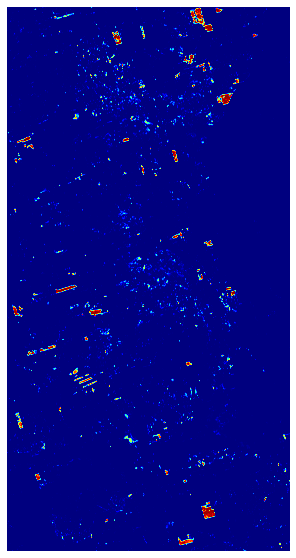

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(17730, 9200)


In [62]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 2)


In [66]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.4999998
    np.max(value): 1.0000001


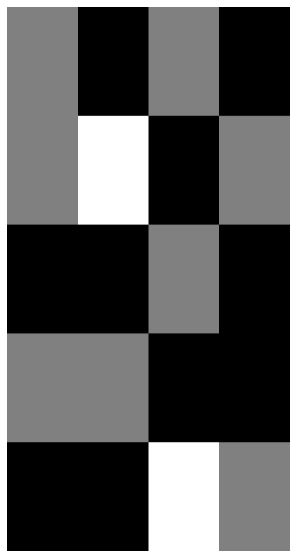

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161368428,   1747572], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162939911,    176089], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 85.77, self.precision: 88.45, self.recall: 83.24


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431485,)
ic| f1_val: 87.05
    precision_val: 84.03
    recall_val: 90.3
    mAP_val: 92.71


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162560284,    555716], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


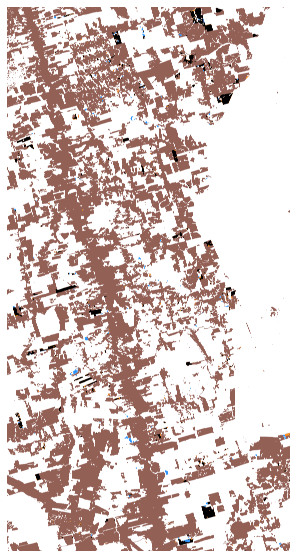

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [82]:
trainer.setUncertainty()

K shape 2, pred_mean shape (17760, 9216, 2)


In [83]:
trainer.uncertainty_map.shape

(17760, 9216)

In [84]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): 7.447331e-15
    np.mean(value): 0.025317399
    np.max(value): 1.0


In [85]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.022068895
    np.max(value): 1.0


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

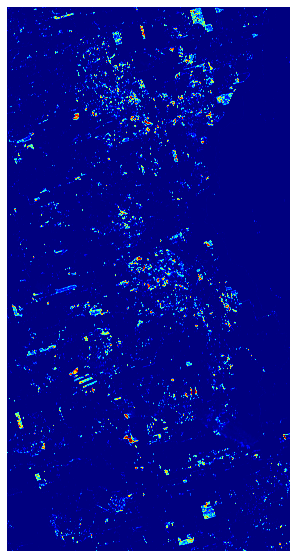

In [86]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



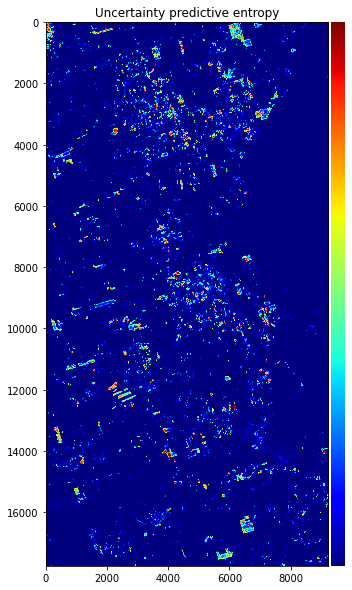

In [87]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [88]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54147114,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


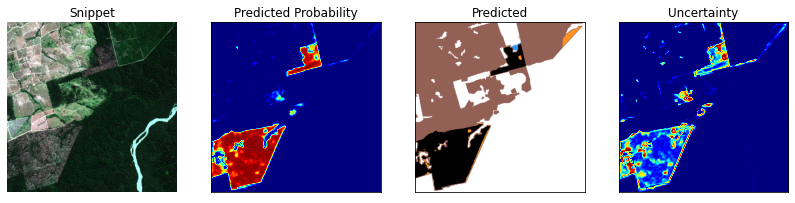

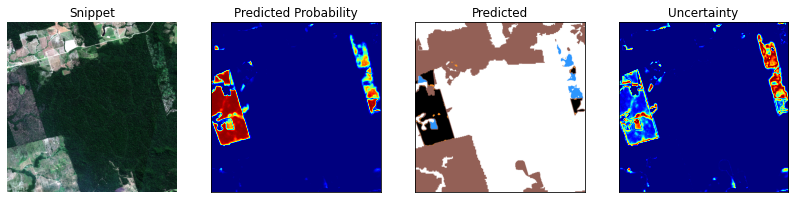

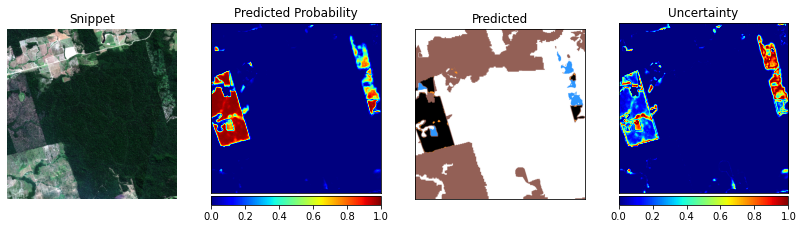

In [89]:
trainer.logger.plotCropSample(trainer)

In [90]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 1.6674236e-09
    np.mean(value): 0.029565189
    np.max(value): 1.0


In [91]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


In [92]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([104050616,   2209014,  56856370], dtype=int64))

In [93]:
label_tmp_dates[0].shape

(17730, 9200)

In [94]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif


In [95]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([160906986,   2209014], dtype=int64))

In [96]:
ims[0].shape

(17730, 9200, 3)

In [97]:
trainer.classes_mode

True

In [98]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [99]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [100]:
import src.backend.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


[(17730, 9200, 3), (17730, 9200, 3), (17730, 9200, 3), (17730, 9200), (17730, 9200, 3), (17730, 9200)]
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


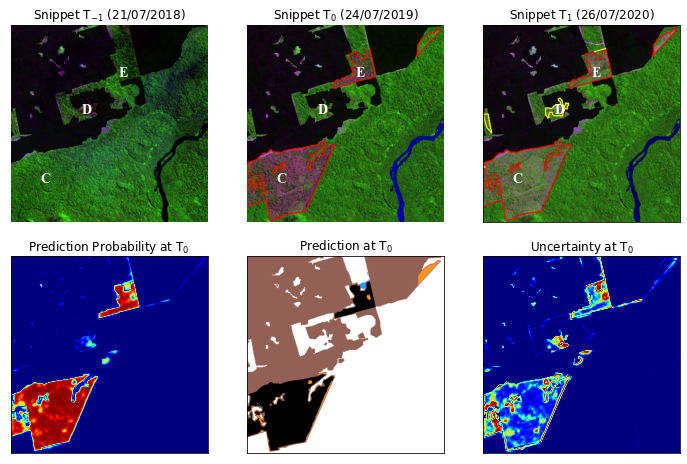

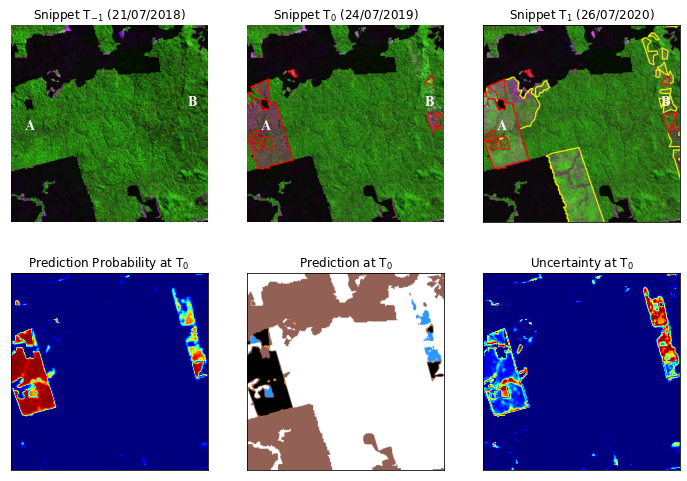

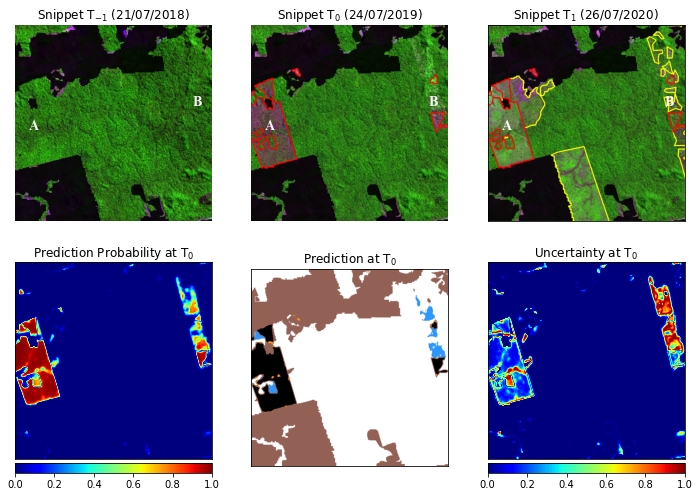

In [101]:
logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


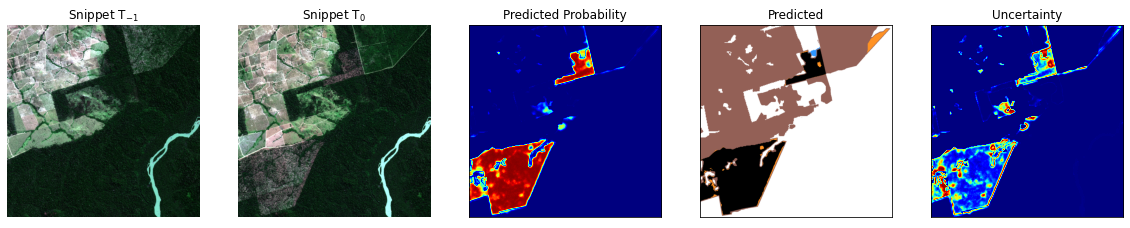

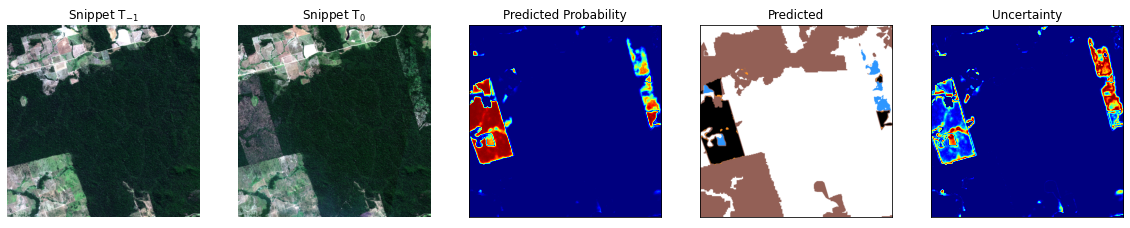

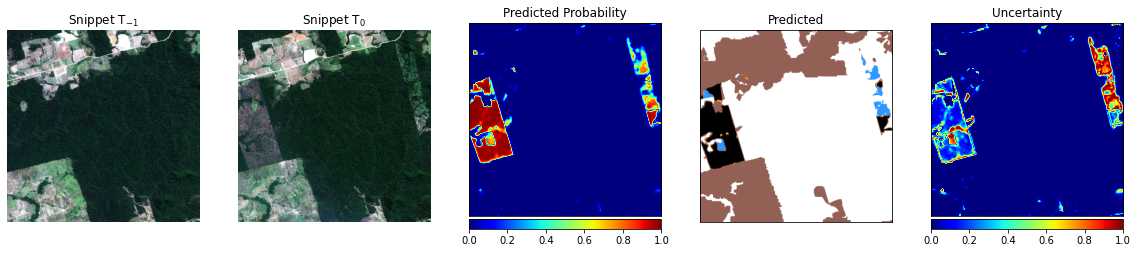

In [102]:
logger.plotCropSampleT0T1(trainer)

In [103]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [104]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [105]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 1.6674236e-09
    np.mean(value): 0.029565189
    np.max(value): 1.0


In [106]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [107]:
trainer.uncertainty.shape

(54147114,)

In [108]:
np.mean(trainer.mean_prob)

0.01406089

In [109]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

(17730, 9200)
[[550, 115], [430, 950]]


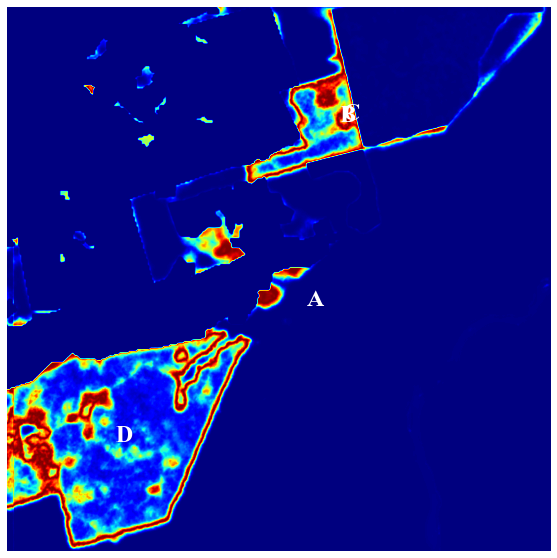

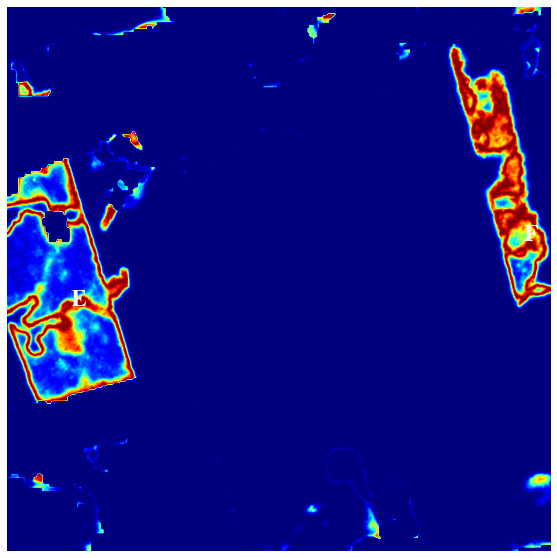

In [110]:
print(trainer.mean_prob.shape)
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 24,
        }

lims = dataset.previewLims1
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['A', 'B', 'C', 'D', 'E', 'F']

for poi_id in range(4):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')

plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

lims = dataset.previewLims2
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['E', 'F']

print(trainer.dataset.snippet_coords['snippet_id1'])
for poi_id in range(2):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')
        
plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [111]:
'''
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')
'''

"\nprint(trainer.mean_prob.shape)\n\nlims = dataset.previewLims1\nim = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]\nplt.figure(figsize=(15,15))\nplt.imshow(im, cmap='jet')\n"

In [112]:
'''
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results
'''

'\ndef getPOIValues(self):\n    self.snippet_poi_results = []\n\n    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]\n    for snippet_id, lims in enumerate(lims_snippets):\n        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:\n            dict_ = {"snippet_id": snippet_id,\n                    "coords": coord, # 10,1 alpha\n                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}\n            \n            predicted_coord = []\n            for idx in range(self.prob_rec.shape[0]):\n                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])\n            predicted_coord = np.array(predicted_coord)\n            dict_["predicted"] = predicted_coord\n\n            self.snippet_poi_results.append(dict_)\n\n    return self.snippet_poi_results\n'

In [113]:

'''
import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)
'''


'\nimport types\n\ntrainer.getPOIValues = types.MethodType(getPOIValues, trainer)\n'

In [114]:

trainer.getPOIValues()


[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([[9.99999821e-01, 2.48296004e-07],
         [1.00000000e+00, 4.16432844e-09],
         [9.99999940e-01, 1.68376213e-09],
         [9.99999762e-01, 2.36679583e-07],
         [9.99965429e-01, 3.45382723e-05],
         [9.99996185e-01, 3.84681698e-06],
         [9.99999940e-01, 1.00834685e-13],
         [1.00000000e+00, 1.32610875e-11],
         [9.99998331e-01, 1.66440691e-06],
         [9.99999940e-01, 8.39343954e-08]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([[0.5445847 , 0.4554153 ],
         [0.5401137 , 0.4598863 ],
         [0.69554514, 0.30445483],
         [0.4672044 , 0.5327956 ],
         [0.53080875, 0.46919134],
         [0.45583624, 0.5441637 ],
         [0.8496789 , 0.150321  ],
         [0.6313229 , 0.36867702],
         [0.4095685 , 0.59043163],
         [0.58385247, 0.4161476 ]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [207,

In [115]:

import pickle
with open('output/log/log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


Get precision-recall threshold

In [116]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


[0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.997, 0.9985]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (9327003,)
    predicted_test_classified_incorrect.shape: (9327003,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 9327003
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 9327003
    len(label_mask_current_deforestation_test): 54147114


[       nan 0.         0.         0.172253   0.884497   0.83766208
 0.02124677]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (4984734,)
    predicted_test_classified_incorrect.shape: (4984734,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 4984734
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4984734
    len(label_mask_current_deforestation_test): 54147114


[       nan 0.         0.         0.09205909 0.884497   0.8421611
 0.03892646]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (4097593,)
    predicted_test_classified_incorrect.shape: (4097593,)
ic| TP_H + FN_H + FP_H + TN_H: 4097593
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4097593
    len(label_mask_current_deforestation_test): 54147114


[1.00000000e+00 6.44541964e-02 9.60183048e-04 7.56751874e-02
 8.84379038e-01 8.44052996e-01 4.68887923e-02]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (3265884,)
    predicted_test_classified_incorrect.shape: (3265884,)
ic| TP_H + FN_H + FP_H + TN_H: 3265884
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 3265884
    len(label_mask_current_deforestation_test): 54147114


[1.         0.79523971 0.06702895 0.06031502 0.87563999 0.83586327
 0.0580048 ]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (2390442,)
    predicted_test_classified_incorrect.shape: (2390442,)
ic| TP_H + FN_H + FP_H + TN_H: 2390442
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2390442
    len(label_mask_current_deforestation_test): 54147114


[1.         0.91672522 0.25410257 0.04414717 0.84177817 0.8001172
 0.0772189 ]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (1517695,)
    predicted_test_classified_incorrect.shape: (1517695,)
ic| TP_H + FN_H + FP_H + TN_H: 1517695
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1517695
    len(label_mask_current_deforestation_test): 54147114


[0.99734201 0.92963031 0.46402446 0.0280291  0.77417074 0.7355782
 0.11405517]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1233093,)
    predicted_test_classified_incorrect.shape: (1233093,)
ic| TP_H + FN_H + FP_H + TN_H: 1233093
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1233093
    len(label_mask_current_deforestation_test): 54147114


[0.99359314 0.92730678 0.53606815 0.02277301 0.73794013 0.70245335
 0.13379619]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (992021,)
    predicted_test_classified_incorrect.shape: (992021,)
ic| TP_H + FN_H + FP_H + TN_H: 992021
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 992021
    len(label_mask_current_deforestation_test): 54147114


[0.98831263 0.92238937 0.5950874  0.01832085 0.70011249 0.6688954
 0.15562908]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (781903,)
    predicted_test_classified_incorrect.shape: (781903,)
ic| TP_H + FN_H + FP_H + TN_H: 781903
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 781903
    len(label_mask_current_deforestation_test): 54147114


[0.9799559  0.91372629 0.64708574 0.01444034 0.66003686 0.63517096
 0.17724969]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (581126,)
    predicted_test_classified_incorrect.shape: (581126,)
ic| TP_H + FN_H + FP_H + TN_H: 581126
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 581126
    len(label_mask_current_deforestation_test): 54147114


[0.9671163  0.90234829 0.69740751 0.01073235 0.61371472 0.59454062
 0.19881887]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (371246,)
    predicted_test_classified_incorrect.shape: (371246,)
ic| TP_H + FN_H + FP_H + TN_H: 371246
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 371246
    len(label_mask_current_deforestation_test): 54147114


[0.94456006 0.88585102 0.74924922 0.00685625 0.5624039  0.53947996
 0.21008046]
threshold 0.997


ic| label_current_deforestation_test_classified_incorrect.shape: (52377,)
    predicted_test_classified_incorrect.shape: (52377,)
ic| TP_H + FN_H + FP_H + TN_H: 52377
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 52377
    len(label_mask_current_deforestation_test): 54147114


[0.89510719 0.8426461  0.82121255 0.00096731 0.47373563 0.4413686
 0.08313847]
threshold 0.9985


ic| label_current_deforestation_test_classified_incorrect.shape: (36588,)
    predicted_test_classified_incorrect.shape: (36588,)
ic| TP_H + FN_H + FP_H + TN_H: 36588
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 36588
    len(label_mask_current_deforestation_test): 54147114


[8.91926006e-01 8.39720071e-01 8.24791790e-01 6.75714684e-04
 4.65936437e-01 4.30169310e-01 6.15096782e-02]


In [117]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


threshold 0.0025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    4578   729657]]
[1.         0.99376494]
threshold 0.025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    8476   725759]]
[1.         0.98845601]
threshold 0.05
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [   10233   724002]]
[1.         0.98606305]
threshold 0.1
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [   12672   721563]]
[1.         0.98274122]
threshold 0.2
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [   16948   717287]]
[1.         0.97691747]
threshold 0.4
(54147114,) (54147114,)
cm_audited [[53411971      908]
 [   25790   708445]]
[0.99871996 0.96487501]
threshold 0.5
(54147114,) (54147114,)
cm_audited [[53410341     2538]
 [   30855   703380]]
[0.99640468 0.95797667]
threshold 0.6
(54147114,) (54147114,)
cm_audited [[53407712     5167]
 [   36764   697471]]
[0.99264628 0.94992884]
threshold 0.7
(54147114,) (54147114,)
cm_audited [[53403161     97

ic| metric_values_audited: array([[1.        , 0.99376494],
                                  [1.        , 0.98845601],
                                  [1.        , 0.98606305],
                                  [1.        , 0.98274122],
                                  [1.        , 0.97691747],
                                  [0.99871996, 0.96487501],
                                  [0.99640468, 0.95797667],
                                  [0.99264628, 0.94992884],
                                  [0.98609913, 0.9389024 ],
                                  [0.9749925 , 0.92452689],
                                  [0.95358348, 0.90345325],
                                  [0.89793687, 0.84664855],
                                  [0.89396451, 0.84256948]])


cm_audited [[53339500    73379]
 [  115591   618644]]
[0.89396451 0.84256948]


In [118]:
trainer.setPlotLimsForUncertaintyAA()

In [119]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [120]:
trainer.xlim


[-0.1, 10.4]

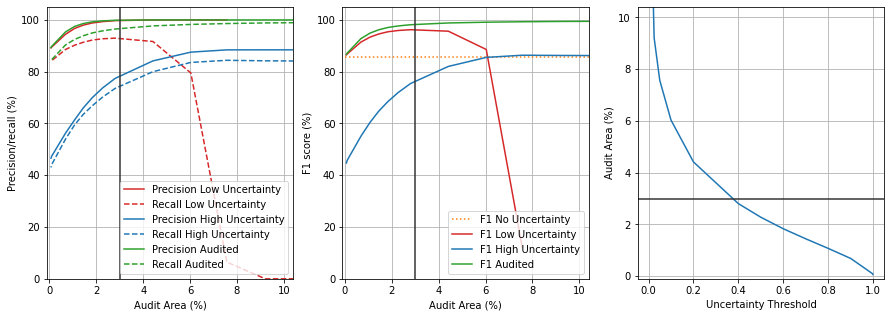

In [121]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

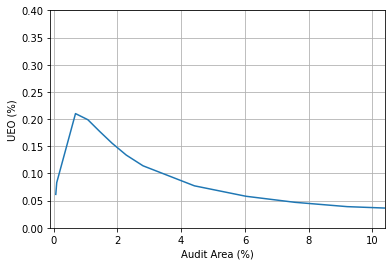

In [122]:
trainer.plotUEO()

In [123]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484


ic| label_current_deforestation_test_classified_incorrect.shape: (1575177,)
    predicted_test_classified_incorrect.shape: (1575177,)
ic| TP_H + FN_H + FP_H + TN_H: 1575177
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1575177
    len(label_mask_current_deforestation_test): 54147114


[0.99786721 0.92976215 0.44924037 0.02909069 0.7805353  0.74145187
 0.11070777]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (952789,)
    predicted_test_classified_incorrect.shape: (952789,)
ic| TP_H + FN_H + FP_H + TN_H: 952789
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 952789
    len(label_mask_current_deforestation_test): 54147114


[0.98731497 0.92116102 0.60465655 0.0175963  0.69294033 0.66294326
 0.15970356]
0.23685977356729035
threshold 0.23685977356729035


ic| label_current_deforestation_test_classified_incorrect.shape: (2177678,)
    predicted_test_classified_incorrect.shape: (2177678,)
ic| TP_H + FN_H + FP_H + TN_H: 2177678
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2177678
    len(label_mask_current_deforestation_test): 54147114


[0.99992388 0.92335714 0.30414377 0.0402178  0.8293788  0.78778235
 0.08391239]
0.4175832367115552
threshold 0.4175832367115552


ic| label_current_deforestation_test_classified_incorrect.shape: (1463394,)
    predicted_test_classified_incorrect.shape: (1463394,)
ic| TP_H + FN_H + FP_H + TN_H: 1463394
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1463394
    len(label_mask_current_deforestation_test): 54147114


[0.99681384 0.92943933 0.47808399 0.02702626 0.76778026 0.72969486
 0.11740686]
0.35678018799445177
threshold 0.35678018799445177


ic| label_current_deforestation_test_classified_incorrect.shape: (1662705,)
    predicted_test_classified_incorrect.shape: (1662705,)
ic| TP_H + FN_H + FP_H + TN_H: 1662705
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1662705
    len(label_mask_current_deforestation_test): 54147114


[0.99841708 0.92987109 0.42694778 0.03070718 0.78963198 0.74972615
 0.10594044]
0.3647978057785885
threshold 0.3647978057785885


ic| label_current_deforestation_test_classified_incorrect.shape: (1634714,)
    predicted_test_classified_incorrect.shape: (1634714,)
ic| TP_H + FN_H + FP_H + TN_H: 1634714
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1634714
    len(label_mask_current_deforestation_test): 54147114


[0.99828248 0.92981104 0.43380798 0.03019023 0.78689146 0.74727707
 0.10742563]
0.3685923050500073
threshold 0.3685923050500073


ic| label_current_deforestation_test_classified_incorrect.shape: (1621583,)
    predicted_test_classified_incorrect.shape: (1621583,)
ic| TP_H + FN_H + FP_H + TN_H: 1621583
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1621583
    len(label_mask_current_deforestation_test): 54147114


[0.9981995  0.92986049 0.43718837 0.02994773 0.78552578 0.74598931
 0.1081479 ]
0.3738358611785137
threshold 0.3738358611785137


ic| label_current_deforestation_test_classified_incorrect.shape: (1603807,)
    predicted_test_classified_incorrect.shape: (1603807,)
ic| TP_H + FN_H + FP_H + TN_H: 1603807
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1603807
    len(label_mask_current_deforestation_test): 54147114


[0.99808645 0.92979047 0.44185989 0.02961944 0.78360795 0.7442799
 0.10910495]
0.36835524303624123
threshold 0.36835524303624123


ic| label_current_deforestation_test_classified_incorrect.shape: (1622430,)
    predicted_test_classified_incorrect.shape: (1622430,)
ic| TP_H + FN_H + FP_H + TN_H: 1622430
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1622430
    len(label_mask_current_deforestation_test): 54147114


[0.99820175 0.92985903 0.43697999 0.02996337 0.78561244 0.74606809
 0.10810036]
0.36732695576388635
threshold 0.36732695576388635


ic| label_current_deforestation_test_classified_incorrect.shape: (1626035,)
    predicted_test_classified_incorrect.shape: (1626035,)
ic| TP_H + FN_H + FP_H + TN_H: 1626035
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1626035
    len(label_mask_current_deforestation_test): 54147114


[0.9982293  0.9298859  0.43611242 0.03002995 0.78596007 0.74637198
 0.10790993]
0.36636090643214886
threshold 0.36636090643214886


ic| label_current_deforestation_test_classified_incorrect.shape: (1629275,)
    predicted_test_classified_incorrect.shape: (1629275,)
ic| TP_H + FN_H + FP_H + TN_H: 1629275
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1629275
    len(label_mask_current_deforestation_test): 54147114


[0.99825382 0.92985524 0.4352394  0.03008978 0.78631091 0.74671753
 0.10772936]
0.36777198169636277
threshold 0.36777198169636277


ic| label_current_deforestation_test_classified_incorrect.shape: (1624487,)
    predicted_test_classified_incorrect.shape: (1624487,)
ic| TP_H + FN_H + FP_H + TN_H: 1624487
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624487
    len(label_mask_current_deforestation_test): 54147114


[0.99821836 0.92989247 0.43648151 0.03000136 0.78581178 0.74623004
 0.10799644]
0.3678143078067634
threshold 0.3678143078067634


ic| label_current_deforestation_test_classified_incorrect.shape: (1624331,)
    predicted_test_classified_incorrect.shape: (1624331,)
ic| TP_H + FN_H + FP_H + TN_H: 1624331
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624331
    len(label_mask_current_deforestation_test): 54147114


[0.99821856 0.9298946  0.4365319  0.02999848 0.78579036 0.74620977
 0.10800531]
0.3677386429080894
threshold 0.3677386429080894


ic| label_current_deforestation_test_classified_incorrect.shape: (1624594,)
    predicted_test_classified_incorrect.shape: (1624594,)
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54147114
ic| self.threshold_optimal: 0.36777198169636277


[0.99821825 0.9298994  0.43645563 0.03000333 0.78582278 0.74623475
 0.10799212]


In [124]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.36777198169636277


ic| label_current_deforestation_test_classified_incorrect.shape: (1624487,)
    predicted_test_classified_incorrect.shape: (1624487,)
ic| TP_H + FN_H + FP_H + TN_H: 1624487
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624487
    len(label_mask_current_deforestation_test): 54147114


[0.99821836 0.92989247 0.43648151 0.03000136 0.78581178 0.74623004
 0.10799644]
threshold 0.36777198169636277
(54147114,) (54147114,)


ic| self.m_optimal: {'AA': array([0.03000136]),
                     'UEO': array([0.10799644]),
                     'f1': 85.77,
                     'f1_H': array([0.7655096]),
                     'f1_L': array([0.96284479]),
                     'precision_H': array([0.78581178]),
                     'precision_L': array([0.99821836]),
                     'recall_H': array([0.74623004]),
                     'recall_L': array([0.92989247]),
                     'recall_Ltotal': array([0.43648151])}
ic| self.m_audited_optimal: {'f1': array([0.98288162]),
                             'precision': array([0.9991951]),
                             'recall': array([0.96709228])}


cm_audited [[53412307      572]
 [   24162   710073]]
[0.9991951  0.96709228]


{'metrics': {'precision_L': array([0.99821836]),
  'recall_L': array([0.92989247]),
  'recall_Ltotal': array([0.43648151]),
  'AA': array([0.03000136]),
  'precision_H': array([0.78581178]),
  'recall_H': array([0.74623004]),
  'UEO': array([0.10799644]),
  'f1_L': array([0.96284479]),
  'f1_H': array([0.7655096]),
  'f1': 85.77},
 'metrics_audited': {'precision': array([0.9991951]),
  'recall': array([0.96709228]),
  'f1': array([0.98288162])},
 'exp': 103}